# Data Statistics

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## 1 Loading pickled stats

In [2]:
def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [32]:
dataset_names = ['taskonomy', 'replica', 'gso', 'hypersim']
splits = ['train', 'val', 'test']
stats_dir = '/scratch/roman/Omnidata/omnidata_stats'

In [33]:
stats_dict = {}

for dataset_name in dataset_names:
    stats_dict[dataset_name] = {}
    for split in splits:
        rots_x = load_pickle(f'{stats_dir}/{dataset_name}-{split}-rots_x.pkl')
        rots_y = load_pickle(f'{stats_dir}/{dataset_name}-{split}-rots_y.pkl')
        rots_z = load_pickle(f'{stats_dir}/{dataset_name}-{split}-rots_z.pkl')
        fovs = load_pickle(f'{stats_dir}/{dataset_name}-{split}-fovs.pkl')
        distances = load_pickle(f'{stats_dir}/{dataset_name}-{split}-distances.pkl') if dataset_name != 'hypersim' else None
        obliqueness_angles = load_pickle(f'{stats_dir}/{dataset_name}-{split}-obliqueness_angles.pkl') if dataset_name != 'hypersim' else None
        points_in_views = load_pickle(f'{stats_dir}/{dataset_name}-{split}-points_in_views.pkl') if dataset_name != 'hypersim' else None
        views_per_point = load_pickle(f'{stats_dir}/{dataset_name}-{split}-views_per_point.pkl') if dataset_name != 'hypersim' else None
        points_per_camera = load_pickle(f'{stats_dir}/{dataset_name}-{split}-points_per_camera.pkl') if dataset_name != 'hypersim' else None
        cameras_per_point = load_pickle(f'{stats_dir}/{dataset_name}-{split}-cameras_per_point.pkl') if dataset_name != 'hypersim' else None
        
        stats_dict[dataset_name][split] = {
            'rots_x': rots_x,
            'rots_y': rots_y,
            'rots_z': rots_z,
            'fovs': fovs,
            'distances': distances,
            'obliqueness_angles': obliqueness_angles,
            'points_in_views': points_in_views,
            'views_per_point': views_per_point,
            'points_per_camera': points_per_camera,
            'cameras_per_point': cameras_per_point
        }

## 2 Histograms of data statistics

In [5]:
COLORS = ['#599ec4', '#d65f3d', '#ecc363']

def get_dataset_prefix(dataset_name):
    dataset_prefix = ''
    if dataset_name == 'taskonomy':
        dataset_prefix = 'Taskonomy: '
    elif dataset_name == 'replica':
        dataset_prefix = 'Replica: '
    elif dataset_name == 'hypersim':
        dataset_prefix = 'Hypersim: '
    elif dataset_name == 'gso':
        dataset_prefix = 'Replica-GSO: '
    return dataset_prefix

def plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=False, save_path=None):
    plt.figure(figsize=(10,5))
    
    if combine:
        all_list = train_list + val_list + test_list
        plt.hist(all_list, bins=bins, density=True, color=COLORS[0], edgecolor='black')
        
    else:
        plt.hist([train_list, val_list, test_list], bins=bins, density=True, 
                 label=['Train', 'Val', 'Test'], color=COLORS, edgecolor='black')
        plt.legend(loc='upper right', fontsize=14, fancybox=False)
        
    dataset_prefix = get_dataset_prefix(dataset_name)
    plt.title(dataset_prefix + title, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, dpi=300)
    else:
        plt.show()
        
def plot_camera_pitch(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['rots_x']
    val_list = stats_dict[dataset_name]['val']['rots_x']
    test_list = stats_dict[dataset_name]['test']['rots_x']
    
    train_list = [abs(rad) * 180/np.pi - 90 for rad in train_list]
    val_list = [abs(rad) * 180/np.pi - 90 for rad in val_list]
    test_list = [abs(rad) * 180/np.pi - 90 for rad in test_list]
    
    bins = 30
        
    title = 'Camera Pitch Histogram'
    xlabel = 'Camera Pitch [degrees]'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
        
def plot_camera_roll(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['rots_y']
    val_list = stats_dict[dataset_name]['val']['rots_y']
    test_list = stats_dict[dataset_name]['test']['rots_y']
    
    train_list = [rad * 180/np.pi for rad in train_list if rad < 1 and rad > -1]
    val_list = [rad * 180/np.pi for rad in val_list if rad < 1 and rad > -1]
    test_list = [rad * 180/np.pi for rad in test_list if rad < 1 and rad > -1]
    
    bins = 30
        
    title = 'Camera Roll Histogram'
    xlabel = 'Camera Roll [degrees]'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)

def plot_fovs(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['fovs']
    val_list = stats_dict[dataset_name]['val']['fovs']
    test_list = stats_dict[dataset_name]['test']['fovs']
    
    train_list = [rad * 180/np.pi for rad in train_list]
    val_list = [rad * 180/np.pi for rad in val_list]
    test_list = [rad * 180/np.pi for rad in test_list]
    
    bins = 30
    
    title = 'Field of View Histogram'
    xlabel = 'Field of View [degrees]'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
    
def plot_distances(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['distances']
    val_list = stats_dict[dataset_name]['val']['distances']
    test_list = stats_dict[dataset_name]['test']['distances']
    
    bins = 30
    
    title = 'Distance to Scene Content Histogram'
    xlabel = 'Distance [meters]'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
    
def plot_obliqueness_angles(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['obliqueness_angles']
    val_list = stats_dict[dataset_name]['val']['obliqueness_angles']
    test_list = stats_dict[dataset_name]['test']['obliqueness_angles']
    
    train_list = [rad * 180/np.pi for rad in train_list]
    val_list = [rad * 180/np.pi for rad in val_list]
    test_list = [rad * 180/np.pi for rad in test_list]
    
    bins = 30
    
    title = '3D Obliqueness of Scene Content Histogram'
    xlabel = 'Obliqueness angle [degrees]'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
    
def plot_points_per_camera(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['points_per_camera']
    val_list = stats_dict[dataset_name]['val']['points_per_camera']
    test_list = stats_dict[dataset_name]['test']['points_per_camera']
    
    bins = 30
        
    title = 'Number of Points in View Histogram'
    xlabel = 'Count'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
    
def plot_views_per_point(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['views_per_point']
    val_list = stats_dict[dataset_name]['val']['views_per_point']
    test_list = stats_dict[dataset_name]['test']['views_per_point']
    
    max_views = np.max(train_list + val_list + test_list)
    
    if combine:
        bins = list(range(0,max_views))
    else:
        bins = list(range(0,max_views,2))
        
    title = 'Number of Views per Point Histogram'
    xlabel = 'Count'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)
    
def plot_cameras_per_point(stats_dict, dataset_name, combine=False, save_path=None):
    train_list = stats_dict[dataset_name]['train']['cameras_per_point']
    val_list = stats_dict[dataset_name]['val']['cameras_per_point']
    test_list = stats_dict[dataset_name]['test']['cameras_per_point']
    
    bins = 30
        
    title = 'Number of Cameras that Observe a Point Histogram'
    xlabel = 'Count'
    
    plot_hist(train_list, val_list, test_list, bins, dataset_name, 
              title, xlabel, ylabel='Density',
              combine=combine, save_path=save_path)

### 2.1 Camera Pitch

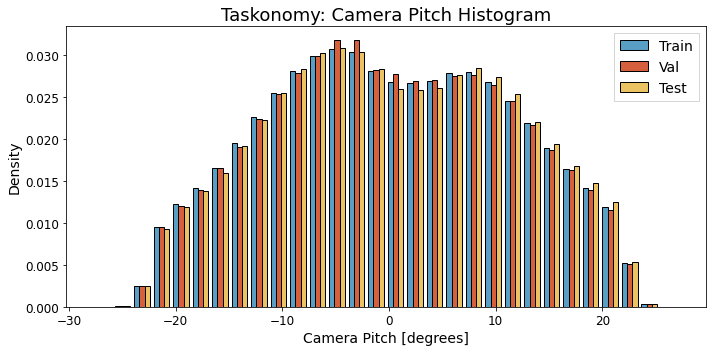

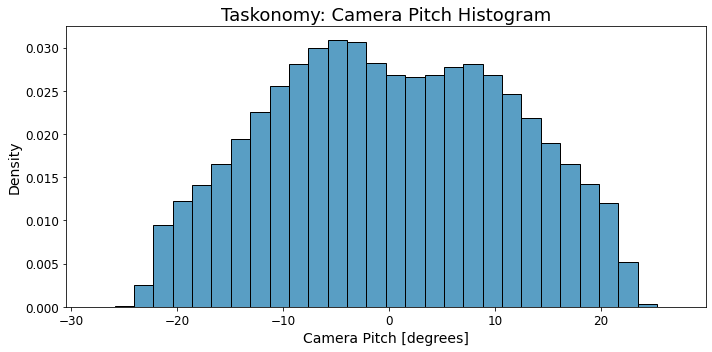

In [6]:
plot_camera_pitch(stats_dict, 'taskonomy', combine=False)
plot_camera_pitch(stats_dict, 'taskonomy', combine=True)

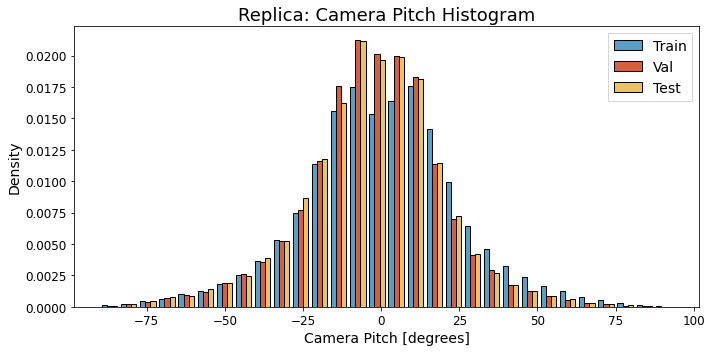

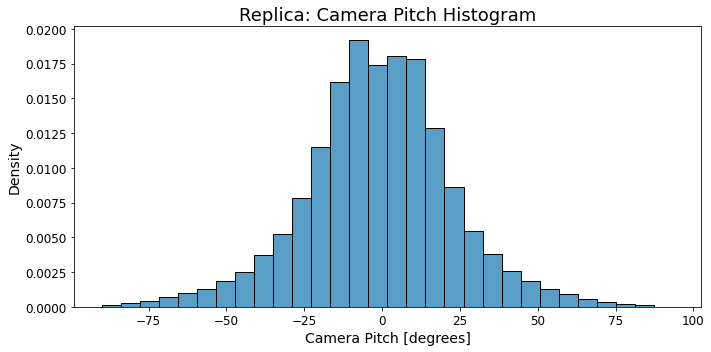

In [7]:
plot_camera_pitch(stats_dict, 'replica', combine=False)
plot_camera_pitch(stats_dict, 'replica', combine=True)

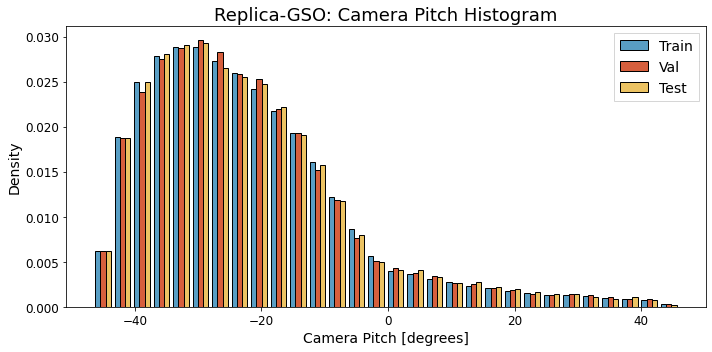

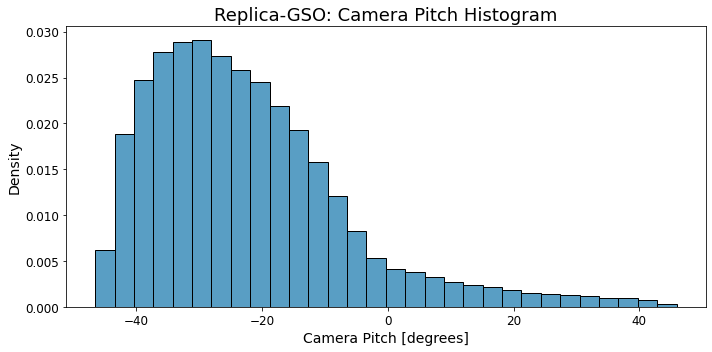

In [8]:
plot_camera_pitch(stats_dict, 'gso', combine=False)
plot_camera_pitch(stats_dict, 'gso', combine=True)

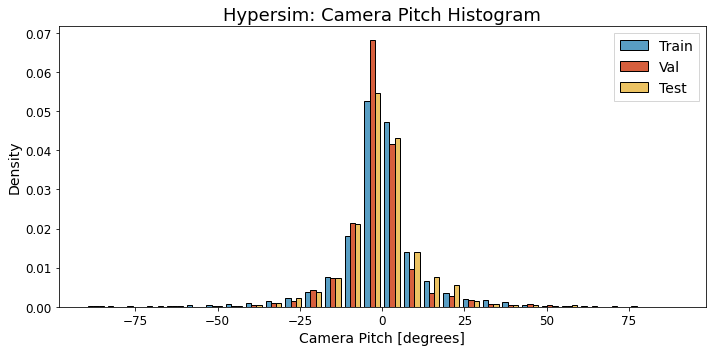

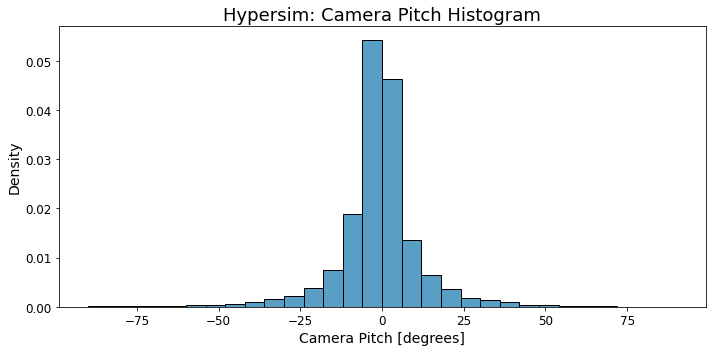

In [22]:
plot_camera_pitch(stats_dict, 'hypersim', combine=False)
plot_camera_pitch(stats_dict, 'hypersim', combine=True)

### 2.2 Camera Roll

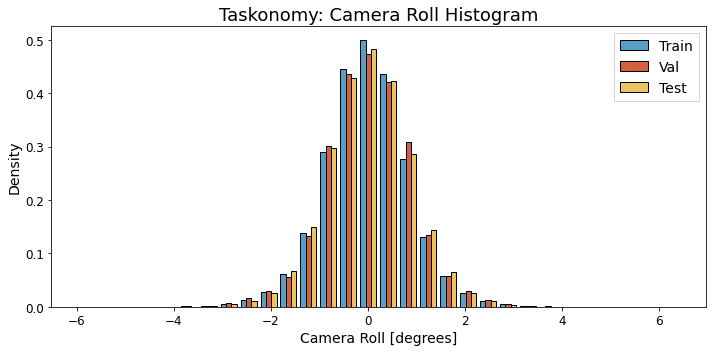

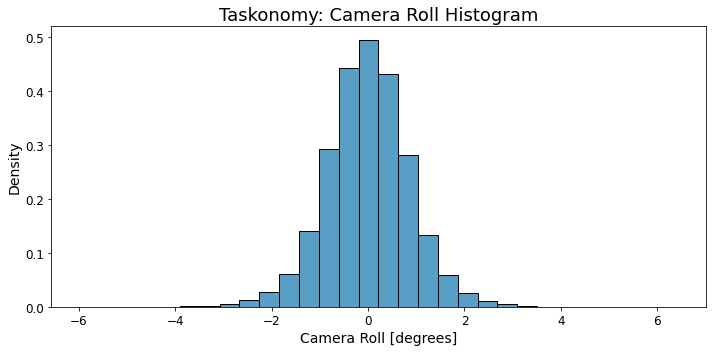

In [9]:
plot_camera_roll(stats_dict, 'taskonomy', combine=False)
plot_camera_roll(stats_dict, 'taskonomy', combine=True)

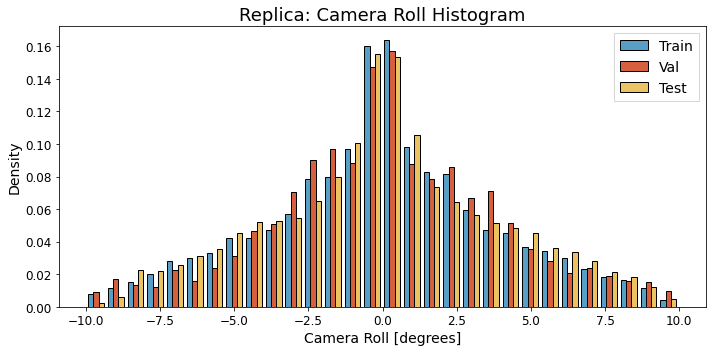

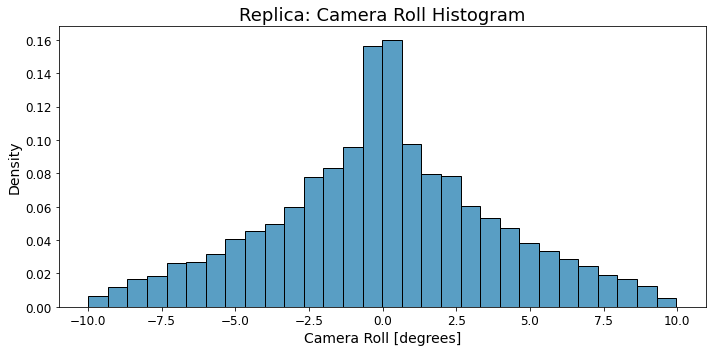

In [10]:
plot_camera_roll(stats_dict, 'replica', combine=False)
plot_camera_roll(stats_dict, 'replica', combine=True)

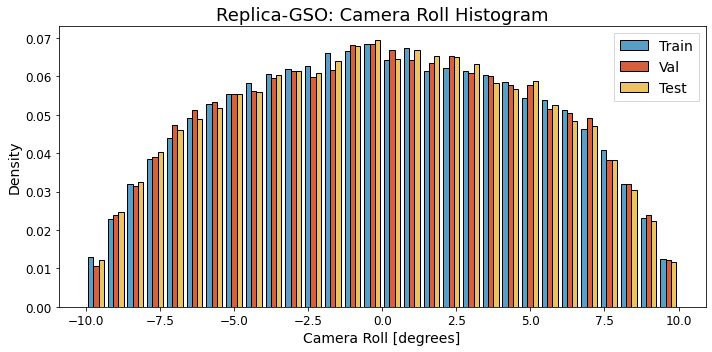

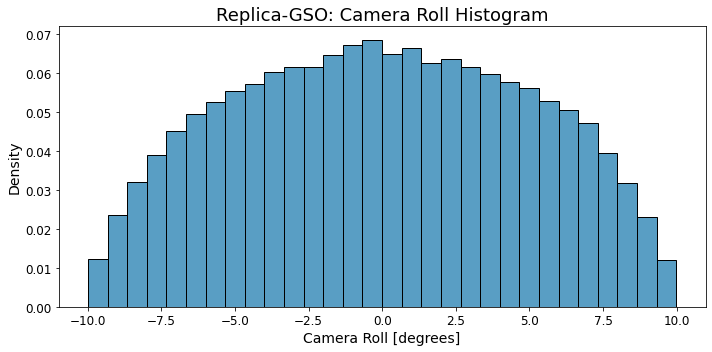

In [11]:
plot_camera_roll(stats_dict, 'gso', combine=False)
plot_camera_roll(stats_dict, 'gso', combine=True)

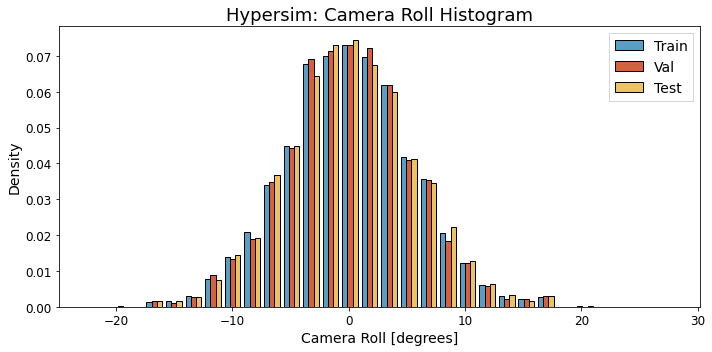

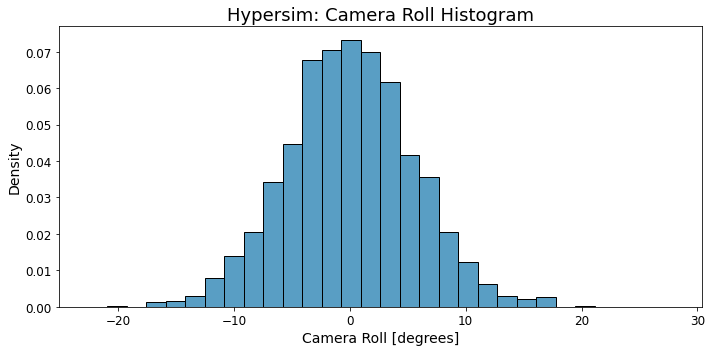

In [23]:
plot_camera_roll(stats_dict, 'hypersim', combine=False)
plot_camera_roll(stats_dict, 'hypersim', combine=True)

### 2.3 Camera FoV (vertical)

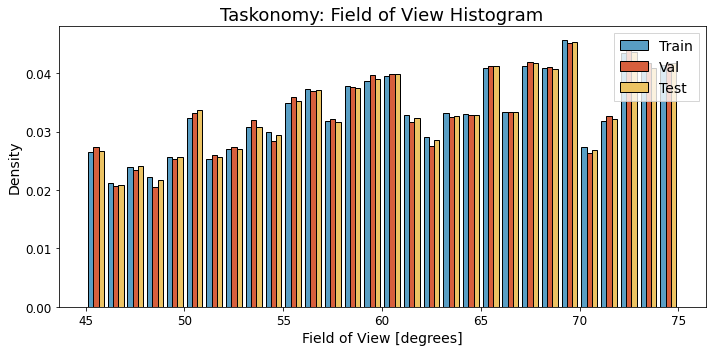

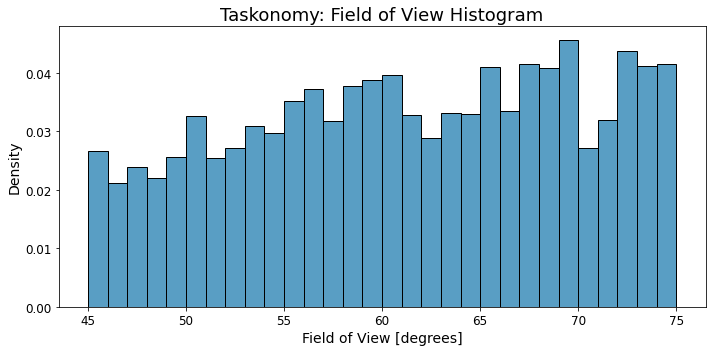

In [12]:
plot_fovs(stats_dict, 'taskonomy', combine=False)
plot_fovs(stats_dict, 'taskonomy', combine=True)

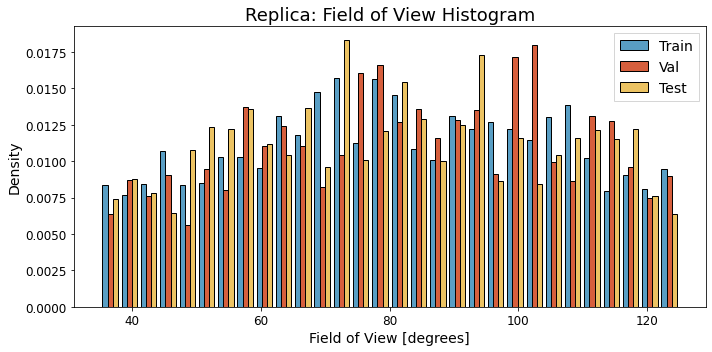

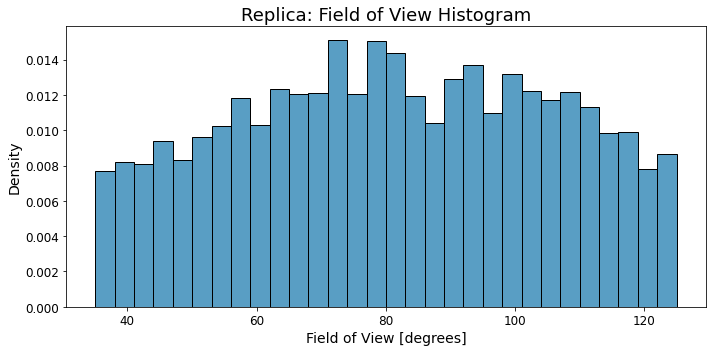

In [13]:
plot_fovs(stats_dict, 'replica', combine=False)
plot_fovs(stats_dict, 'replica', combine=True)

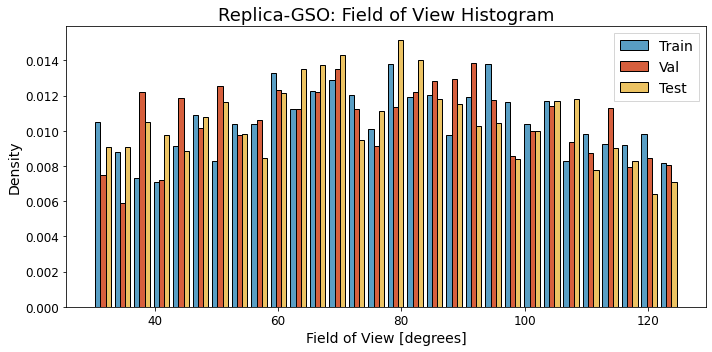

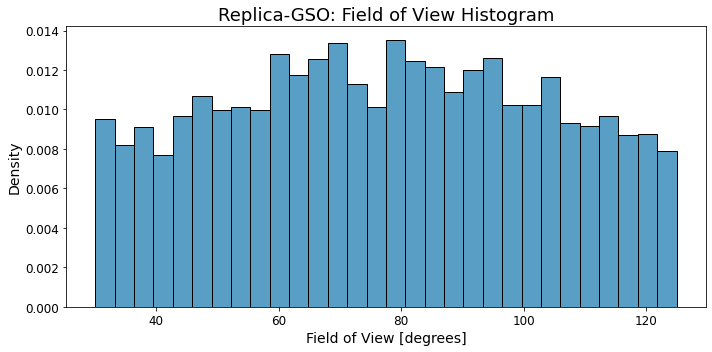

In [14]:
plot_fovs(stats_dict, 'gso', combine=False)
plot_fovs(stats_dict, 'gso', combine=True)

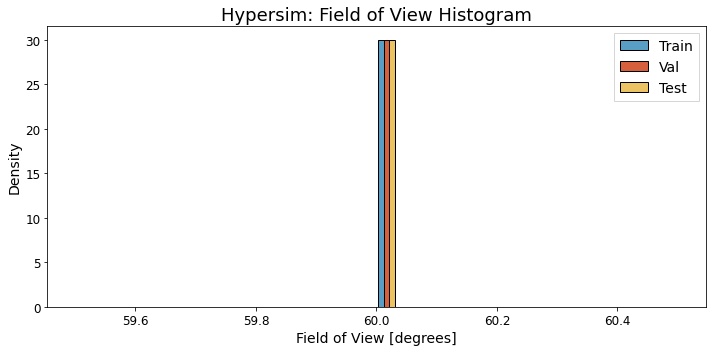

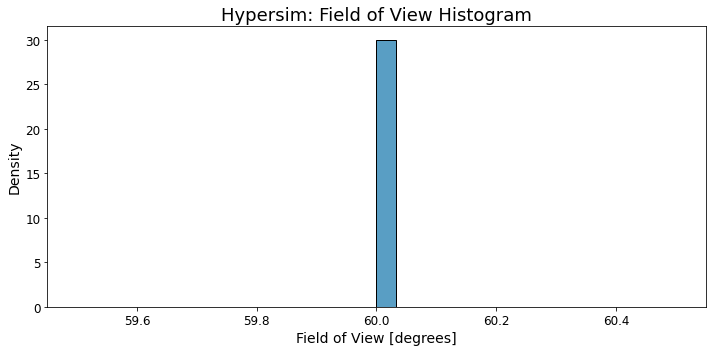

In [15]:
plot_fovs(stats_dict, 'hypersim', combine=False)
plot_fovs(stats_dict, 'hypersim', combine=True)

### 2.4 Distances

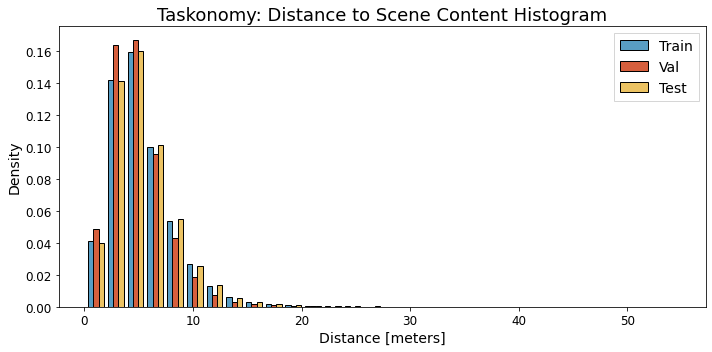

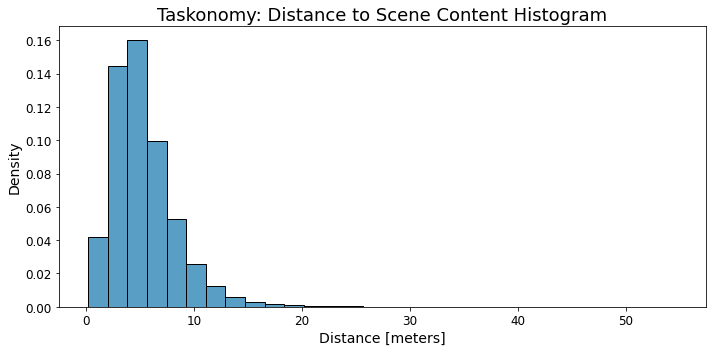

In [16]:
plot_distances(stats_dict, 'taskonomy', combine=False)
plot_distances(stats_dict, 'taskonomy', combine=True)

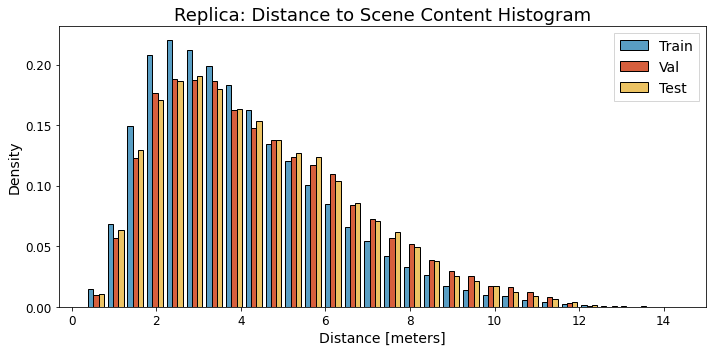

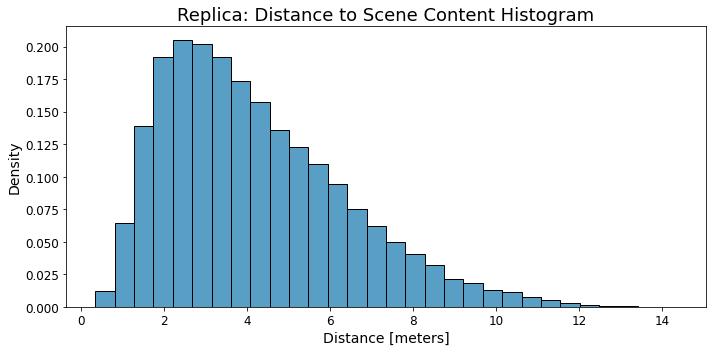

In [17]:
plot_distances(stats_dict, 'replica', combine=False)
plot_distances(stats_dict, 'replica', combine=True)

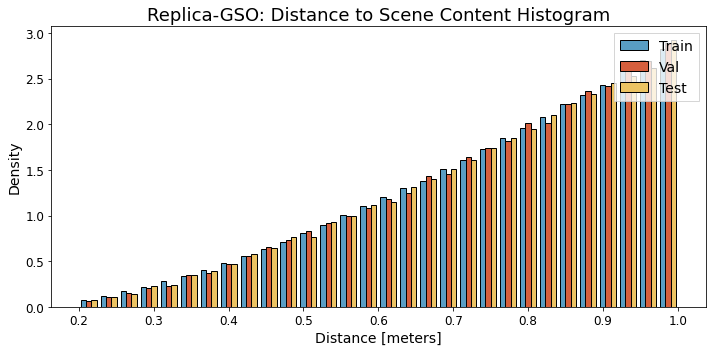

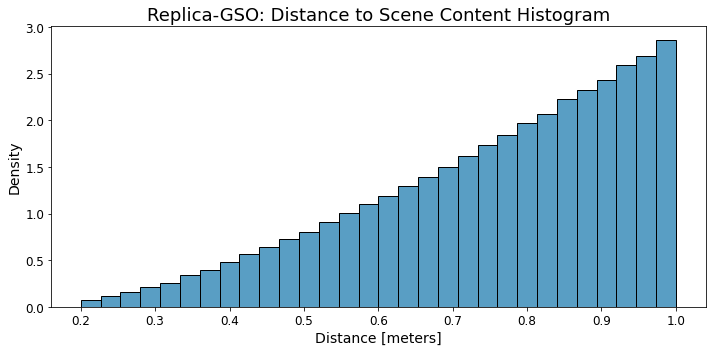

In [18]:
plot_distances(stats_dict, 'gso', combine=False)
plot_distances(stats_dict, 'gso', combine=True)

### 2.5 Obliqueness Angles

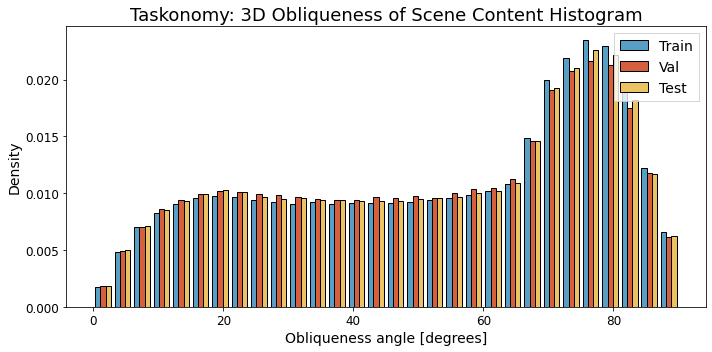

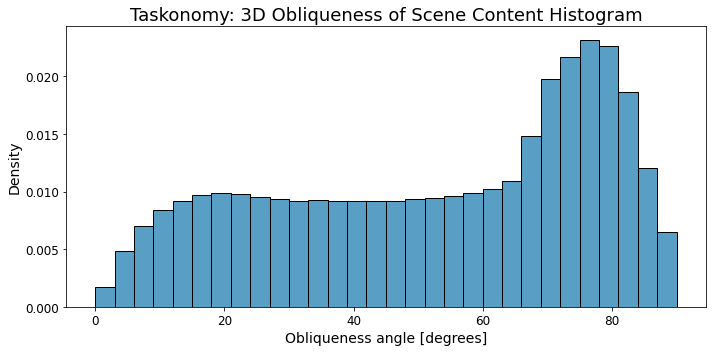

In [19]:
plot_obliqueness_angles(stats_dict, 'taskonomy', combine=False)
plot_obliqueness_angles(stats_dict, 'taskonomy', combine=True)

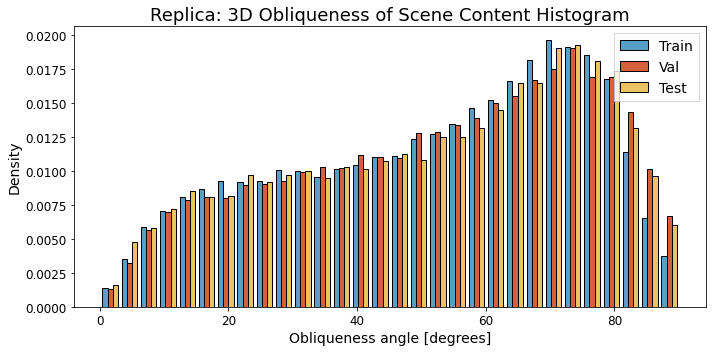

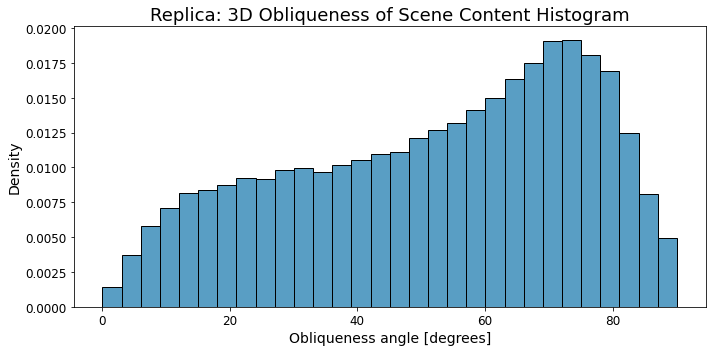

In [20]:
plot_obliqueness_angles(stats_dict, 'replica', combine=False)
plot_obliqueness_angles(stats_dict, 'replica', combine=True)

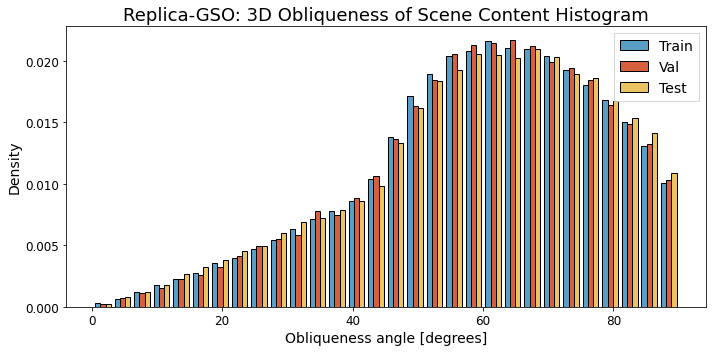

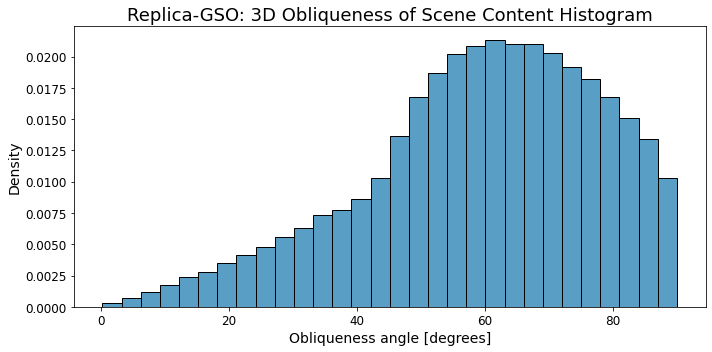

In [21]:
plot_obliqueness_angles(stats_dict, 'gso', combine=False)
plot_obliqueness_angles(stats_dict, 'gso', combine=True)

### 2.6 Number of views per point

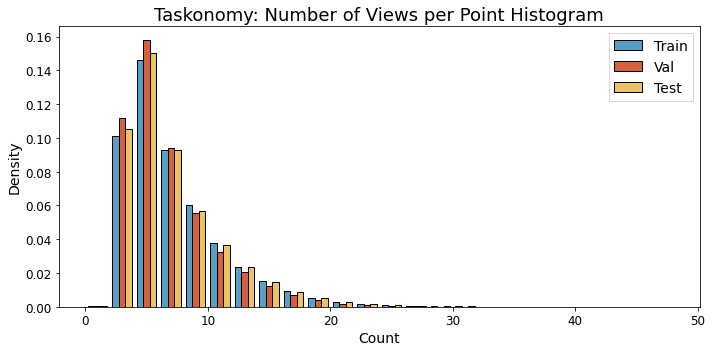

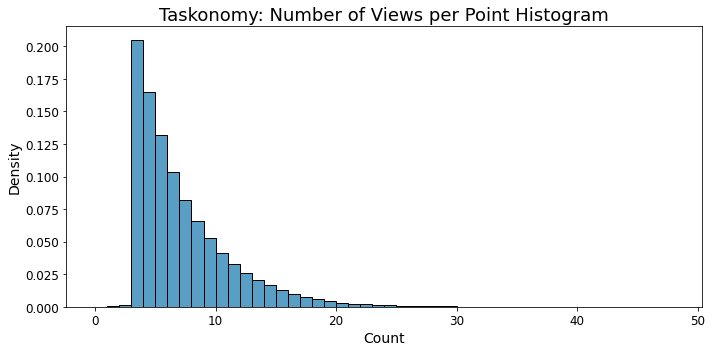

In [25]:
plot_views_per_point(stats_dict, 'taskonomy', combine=False)
plot_views_per_point(stats_dict, 'taskonomy', combine=True)

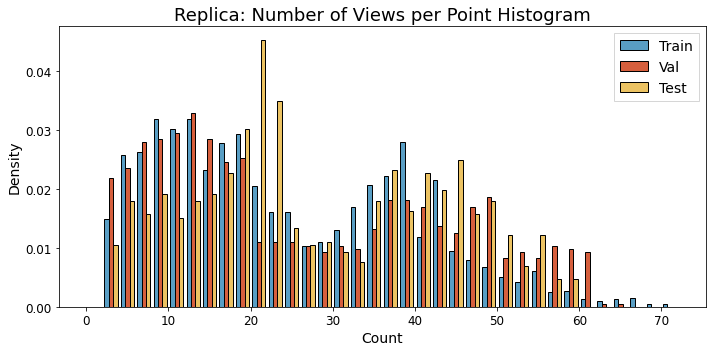

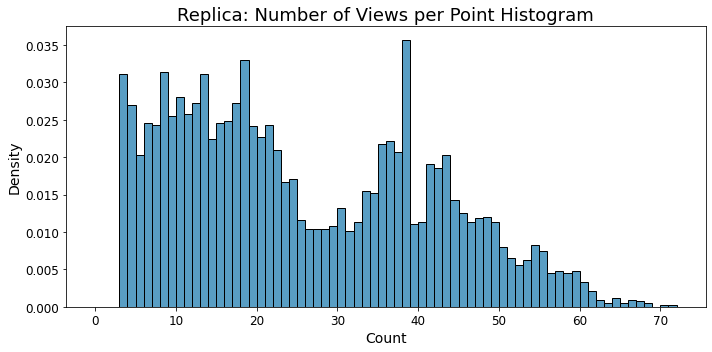

In [26]:
plot_views_per_point(stats_dict, 'replica', combine=False)
plot_views_per_point(stats_dict, 'replica', combine=True)

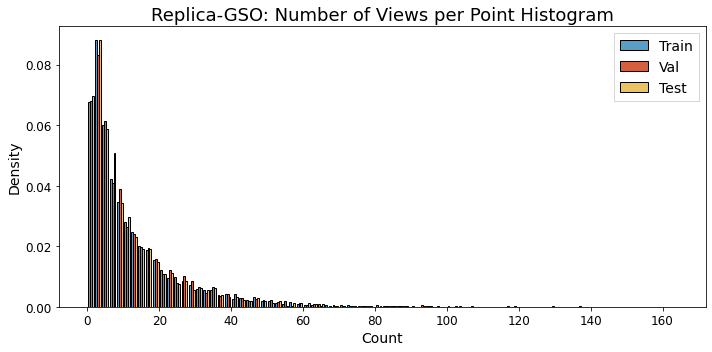

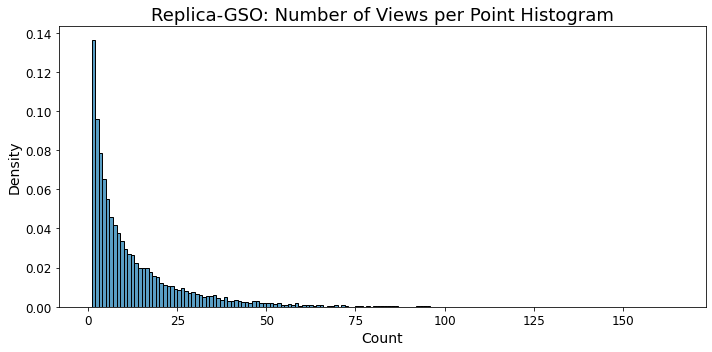

In [27]:
plot_views_per_point(stats_dict, 'gso', combine=False)
plot_views_per_point(stats_dict, 'gso', combine=True)

### 2.7 Number of non-fixated points per "camera point" (i.e. total over all camera views)

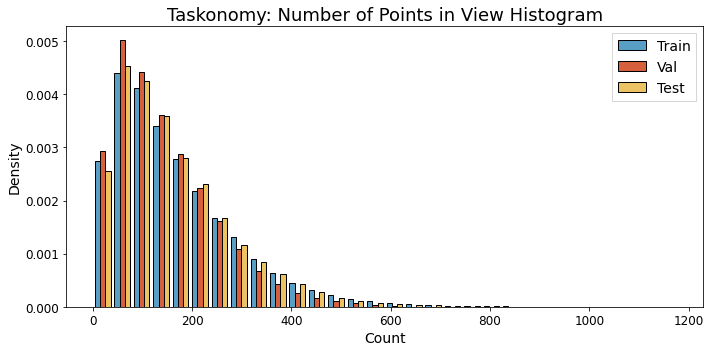

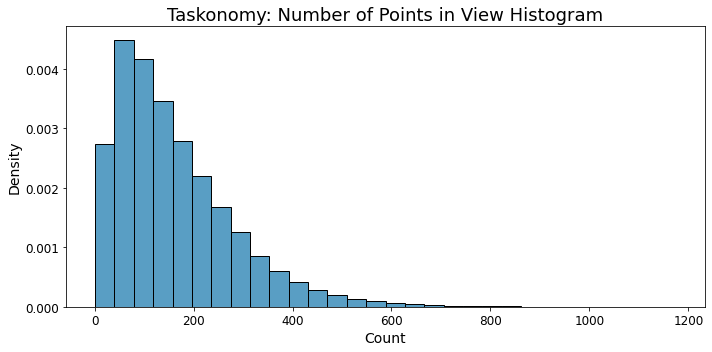

In [28]:
plot_points_per_camera(stats_dict, 'taskonomy', combine=False)
plot_points_per_camera(stats_dict, 'taskonomy', combine=True)

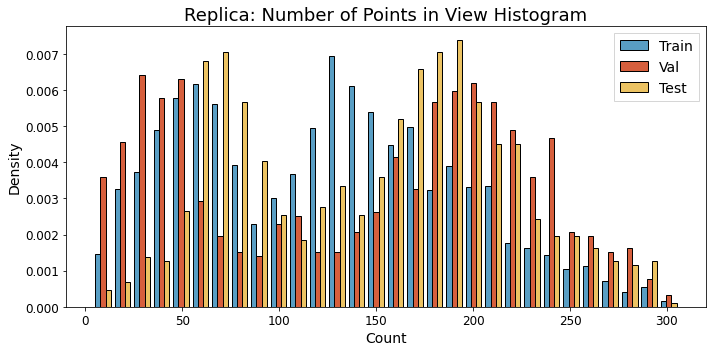

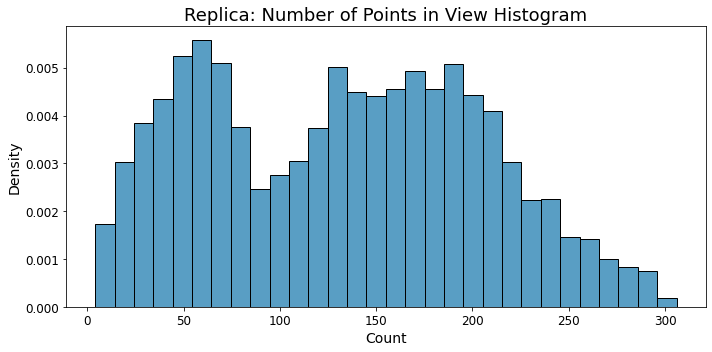

In [29]:
plot_points_per_camera(stats_dict, 'replica', combine=False)
plot_points_per_camera(stats_dict, 'replica', combine=True)

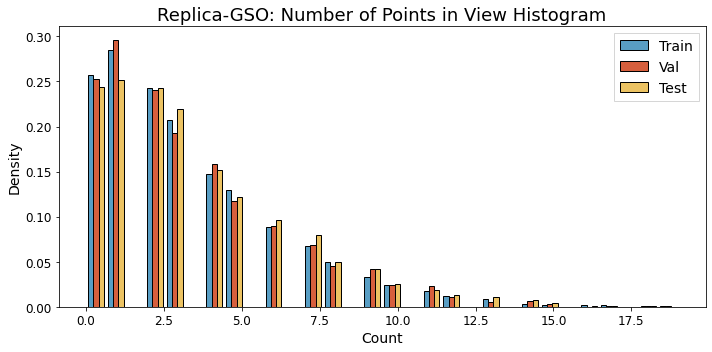

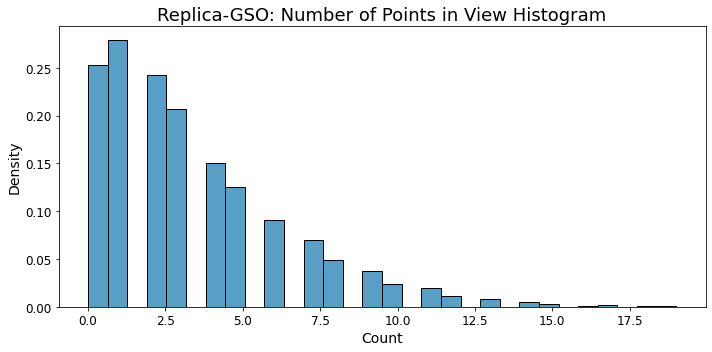

In [30]:
plot_points_per_camera(stats_dict, 'gso', combine=False)
plot_points_per_camera(stats_dict, 'gso', combine=True)